# Fandango Reviews: Legit or Bias?

## Table of Contents

1. Introduction

2. Imports

3. Loading Data sets

4. Part One: Exploring Fandango Displayed Scores versus True User Ratings

5. Part Two: Exploring the Other Sites Ratings and Counts

6. Part Three: Comparison of Fandango Ratings to Other Sites

7. Conclusion

# 1. Introduction

In 2015, an article titled ["Be Suspicious Of Online Movie Ratings, Especially Fandango's"](https://fivethirtyeight.com/features/fandango-movies-ratings/) was published on the data science website [FiveThirtyEight](https://fivethirtyeight.com) by [Walt Hickey](http://walthickey.com/). This article was an exposé of online movie ratings manipulation, focusing on the worst identified culprit, [Fandango](fandango.com). 

The goal of this analysis is to see if we reach the conclusion that Fandango was inflating their movie ratings, and how their competitors were rating the same movies. The following movie rating sources are:

- Rotten Tomatoes Critics
- Rotten Tomatoes Users
- Metacritic Critics
- Metacritic Users
- IMDb Users
- Fandango

#### A brief description of the data sets:

###### all_sites_score.csv

It contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

##### fandango_scrap.csv

It contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

# 2. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('mode.chained_assignment', None)

# 3. Loading Data sets

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
all_sites = pd.read_csv("all_sites_scores.csv")

# 4. Part One: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

### Data Assessing

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.8+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Data Cleaning

Notice, that `FILM` column is Title (Year). We'll create a new column that is able to strip the year from the title strings and set this new column as `YEAR`.

In [7]:
fandango['YEAR'] = fandango['FILM'].apply(lambda film: film.replace(')','').split('(')[-1])
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


### Data Analysis

Let's explore the relationship between popularity of a film and its rating.

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

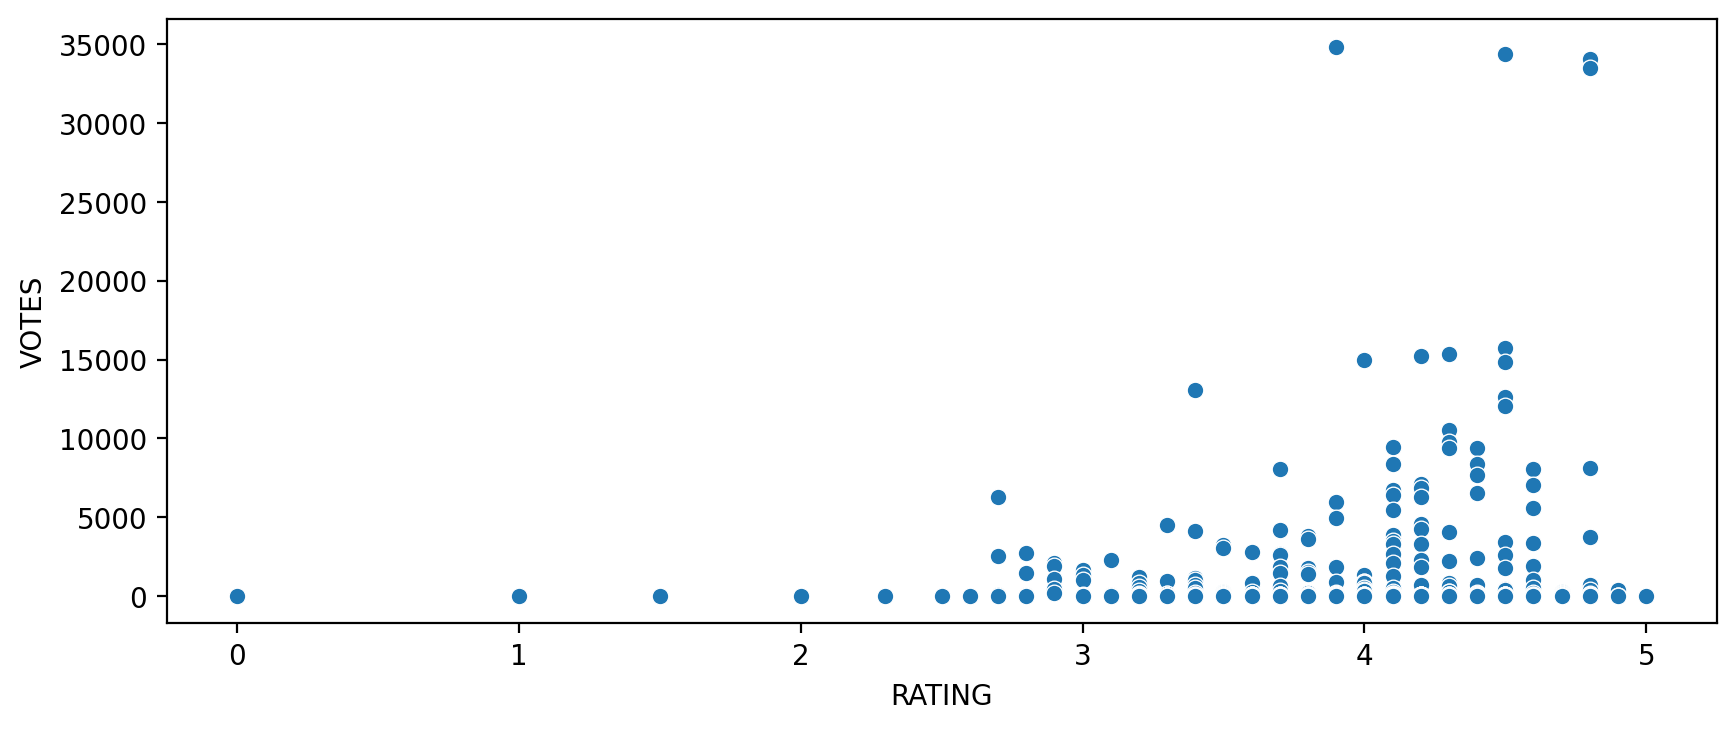

In [8]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=fandango,y='VOTES', x='RATING')

The correlation of the columns:

In [9]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Movies in the Fandango DataFrame per year:

In [10]:
fandango['YEAR'].value_counts()

2015    478
2014     23
1964      1
2012      1
2016      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

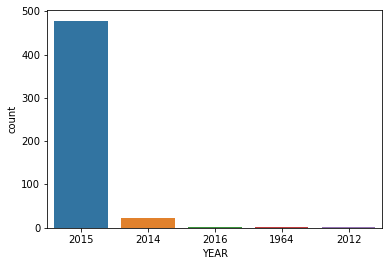

In [11]:
sns.countplot(data=fandango, x='YEAR')

Top 10 movies with the largest votes:

In [12]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Movies with 0 votes:

In [13]:
len(fandango[fandango['VOTES'] == 0])

69

This number is considerably high, so we'll removing any films that have zero votes by creating a new dataframe.

In [14]:
df = fandango[fandango['VOTES'] > 0]
df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


### True Rating VS Stars Displayed

As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.

#### KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).

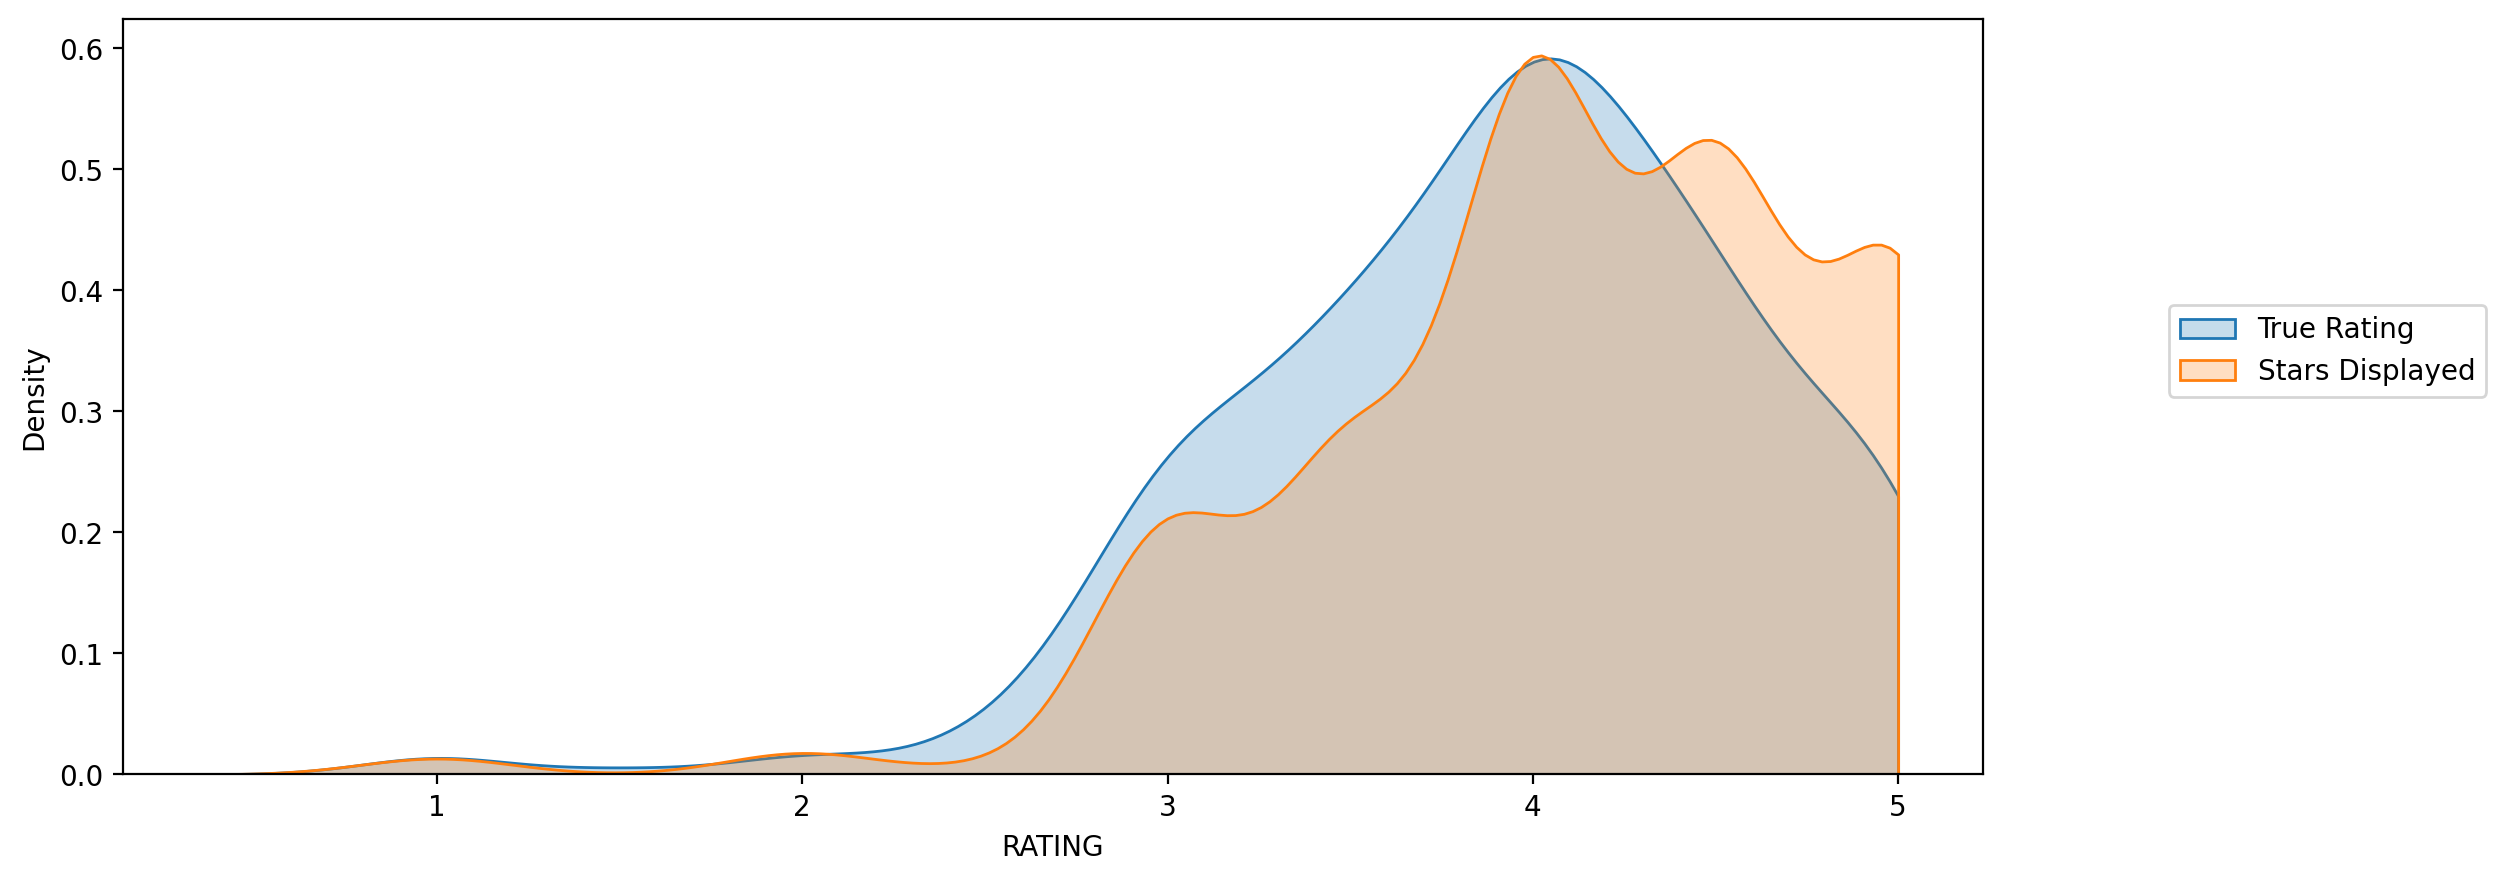

In [15]:
plt.figure(figsize=(12,5), dpi=200)
sns.kdeplot(data=df, x='RATING', fill=True, clip=(0,5), label='True Rating')
sns.kdeplot(data=df, x='STARS', fill=True, clip=(0,5), label='Stars Displayed')

plt.legend(loc=(1.1,0.5))

#### Now, we'll quantify this discrepancy by creating a new column of the difference between STARS displayed versus true RATING. 

In [16]:
df['STAR_DIFF'] = round(df['STARS'] - df['RATING'],1)
df

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


#### Count plot to display the number of times a certain difference occurs:

<AxesSubplot:xlabel='STAR_DIFF', ylabel='count'>

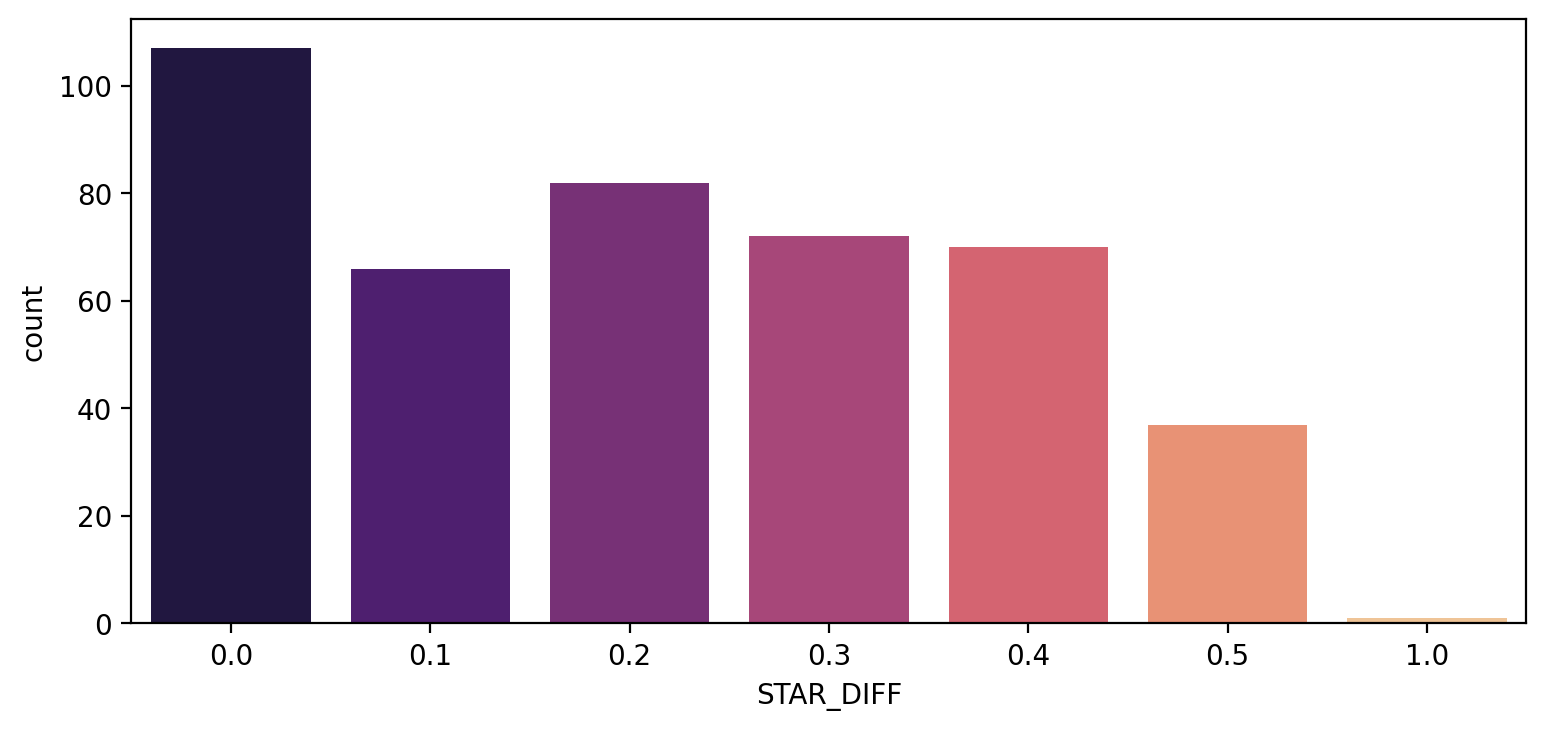

In [17]:
plt.figure(figsize=(9,4), dpi=200)
sns.countplot(data=df, x='STAR_DIFF', palette='magma')

We can see from the plot that one movie was displaying over a 1 star difference than its true rating!

In [18]:
df[df['STAR_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# 5. Part Two: Exploring the Other Sites Ratings and Counts

### Data Assessing

In [19]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [20]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 8.6+ KB


In [21]:
all_sites.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


### Rotten Tomatoes¶

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critic reviews (ratings published by official critics) and user reviews.

We'll explore the relationship between RT Critic reviews and RT User reviews.

(0.0, 100.0)

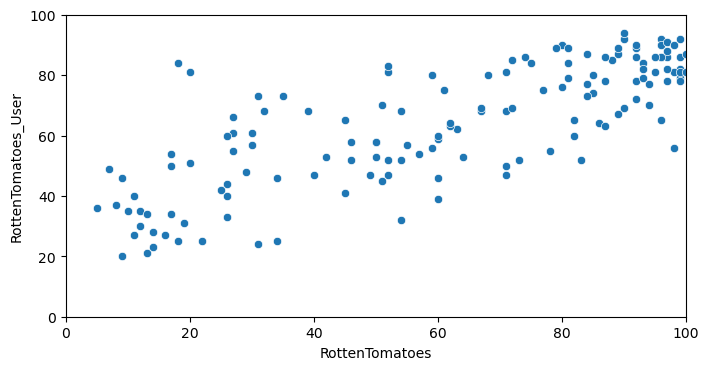

In [22]:
plt.figure(figsize=(8,4), dpi=100)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

Let's quantify this difference by comparing the RT critic ratings and the RT user ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

In [23]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User'] 

Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

In [24]:
# Absolute difference between critic ratings and user ratings
all_sites['Rotten_Diff'].abs().mean()

15.095890410958905

The absolute difference between a critic rating and a user rating is about 15 points.

Text(0.5, 1.0, 'RT Critics Score - RT User Score')

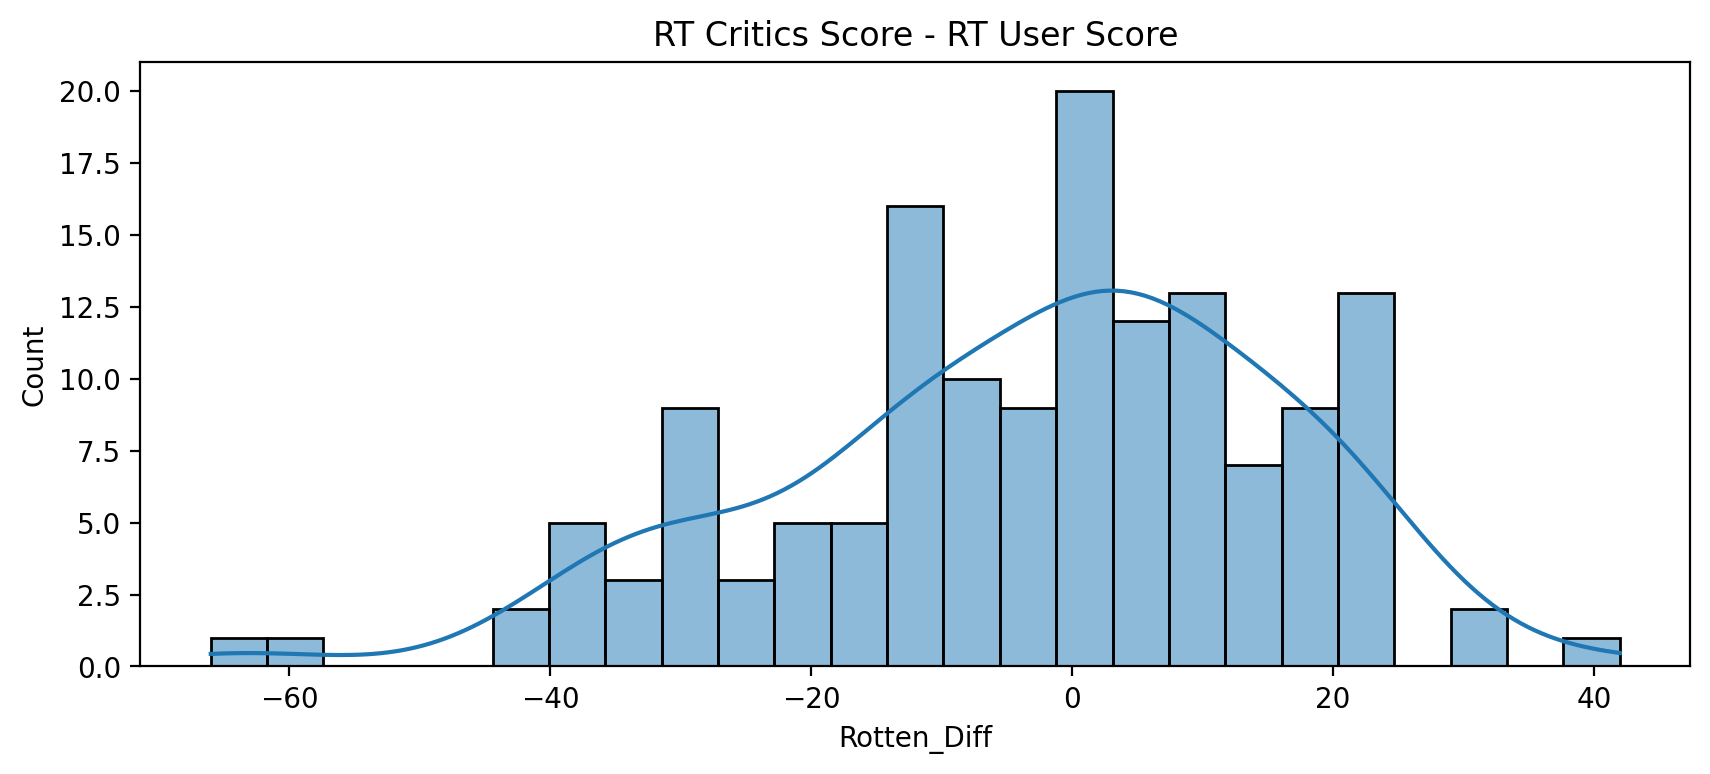

In [25]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=all_sites, x='Rotten_Diff', bins=25, kde=True)
plt.title('RT Critics Score - RT User Score')

Wel'll create a distribution showing the absolute mean value difference between Critics and Users on Rotten Tomatoes.

In [26]:
positive = pd.DataFrame(all_sites['Rotten_Diff'].abs())

Text(0.5, 1.0, 'Abs Difference between RT Critics Score and RT User Score')

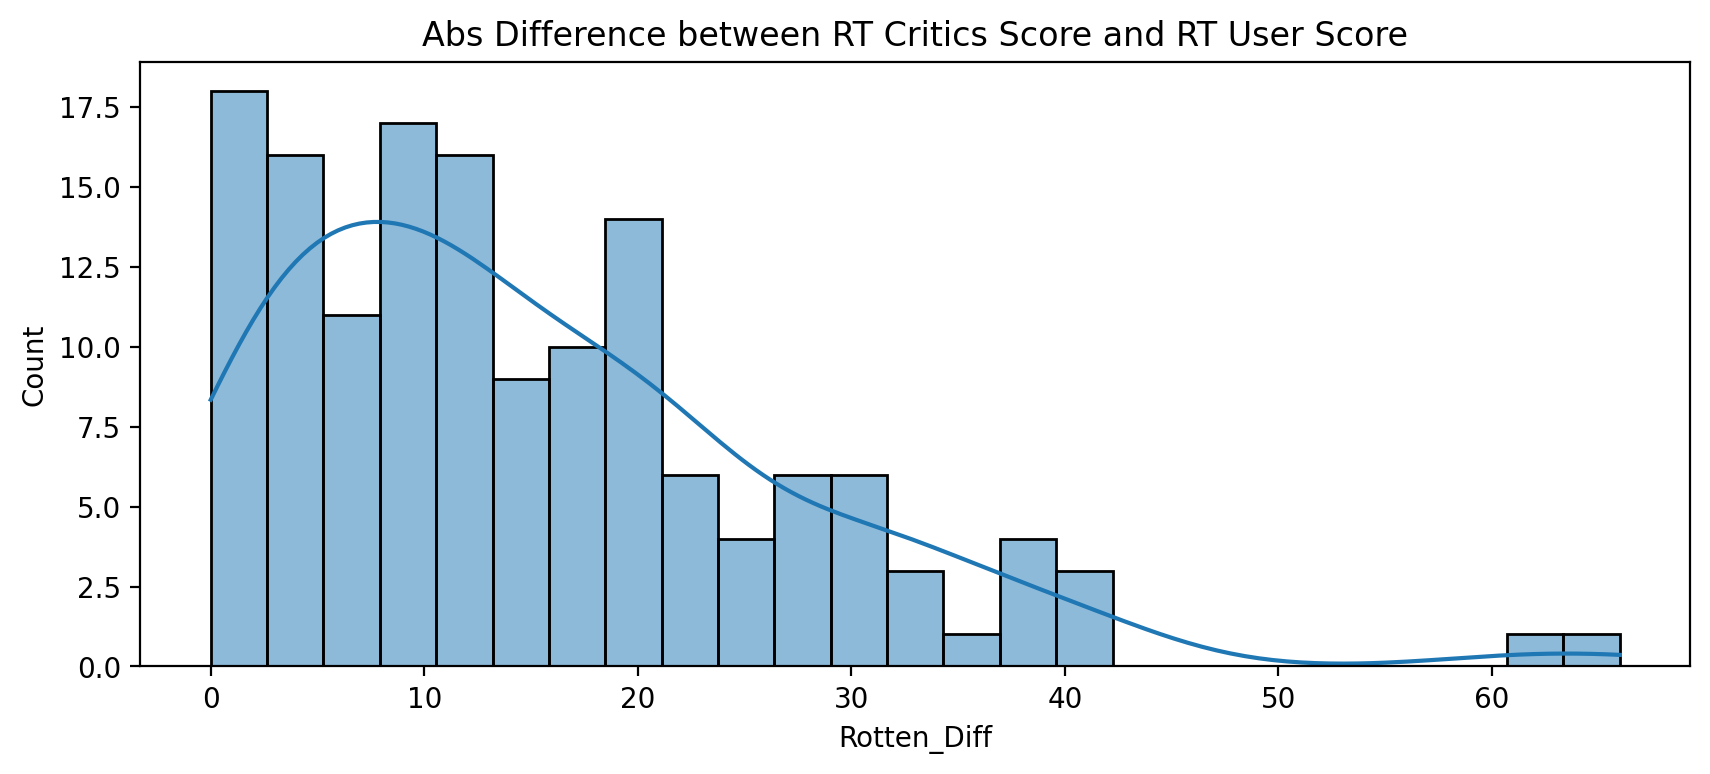

In [27]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=positive, x='Rotten_Diff', bins=25, kde=True)
plt.title('Abs Difference between RT Critics Score and RT User Score')

We'll find out which movies are causing the largest differences. First, show the top 5 movies with the largest negative difference between RT critics and users. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did. Then, we'll display the top 5 movie with the largest positive difference to see which ones the critics reviewed higher.

In [28]:
# top 5 movies users rated higher than critics on average
print("Users Love but Critics Hate")
all_sites.nsmallest(5,'Rotten_Diff')[['FILM', 'Rotten_Diff']]

Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [29]:
# top 5 movies critics rated higher than users on average
print("Critics Love but Users Hate")
all_sites.nlargest(5,'Rotten_Diff')[['FILM', 'Rotten_Diff']]

Critics Love but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

We'll explore the relationship between the Metacritic Rating and the Metacritic User rating.

(0.0, 100.0)

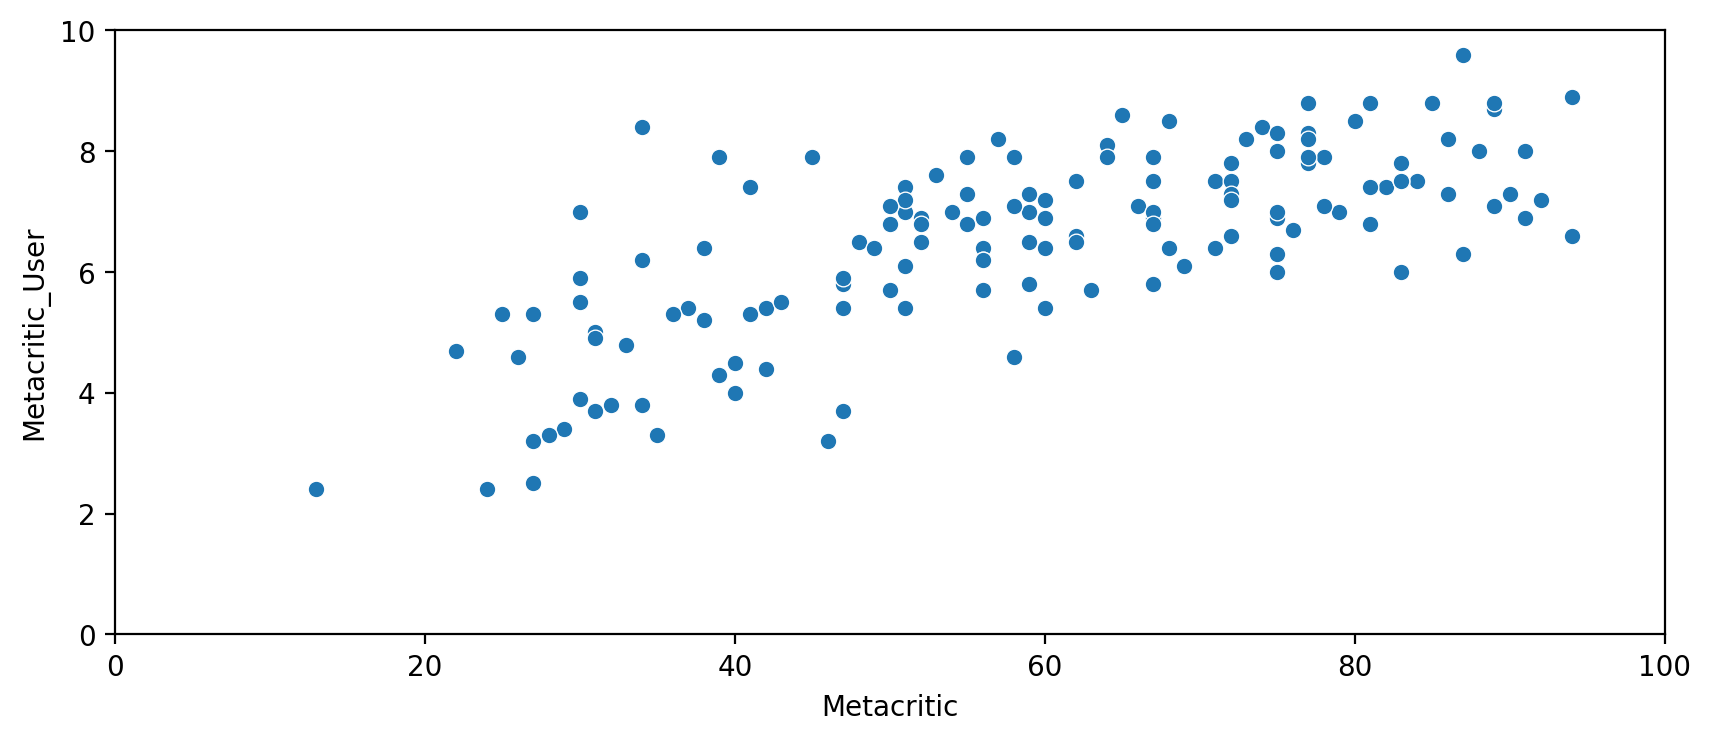

In [30]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

We won't seek to find differences in the official rating and user rating because the scales are different.

### IMDB

Finally we'll explore IMDB. Notice that both Metacritic and IMDB report back vote counts. We'll analyze the most popular movies.

We'll explore the relationship between vote counts on MetaCritic versus vote counts on IMDB.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

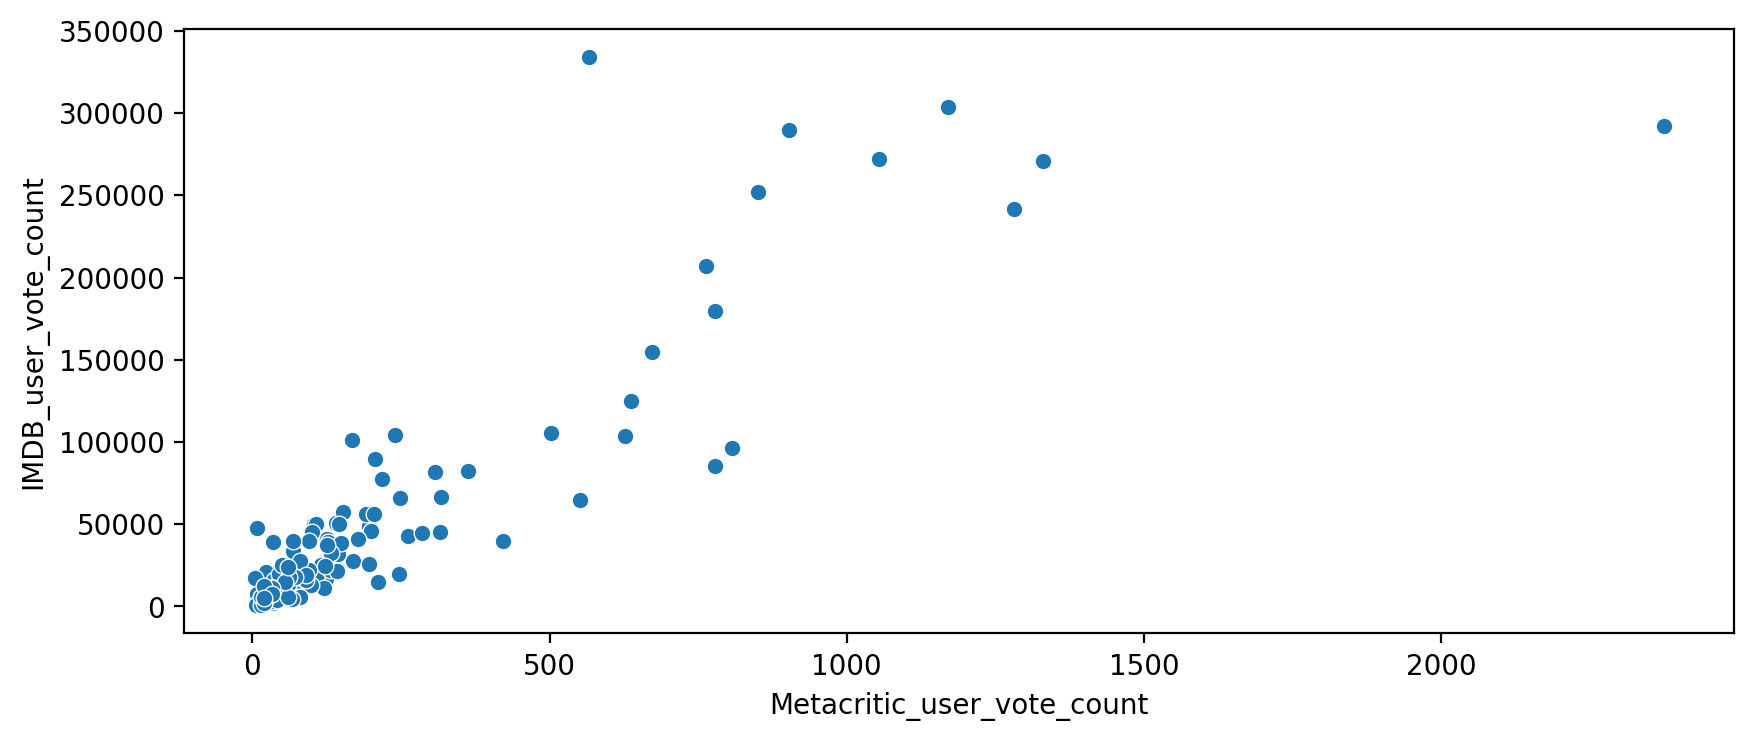

In [31]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. And the movie that has the highest Metacritic vote count. We'll display them.

In [32]:
# the highest IMDB user vote count
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [33]:
# the highest Metacritic user vote count
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# 6. Part Three: Comparison of Fandango Ratings to Other Sites

Finally we'll begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

We'll combine the Fandango table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so we'll merge based FILM columns.

In [34]:
films = pd.merge(how='inner', right=all_sites, left=fandango, on='FILM')

In [35]:
films.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [36]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


### Normalize columns to Fandango STARS and RATINGS 0-5
RT, Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to normalize these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

We'll create a new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango.

In [37]:
# normalizes RT critic and user ratings
films['RT_Norm'] = round(films['RottenTomatoes']/20,1)
films['RT_User_Norm'] = round(films['RottenTomatoes_User']/20,1)

# normalizes Metacritic official and user ratings
films['MC_Norm'] = round(films['Metacritic']/20,1)
films['MC_User_Norm'] = round(films['Metacritic_User']/2,1)

# normalizes IMDB ratings
films['IMDB_Norm'] = round(films['IMDB']/2,1)

In [38]:
films.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RT_User_Norm,MC_Norm,MC_User_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


### Normalized All Sites and Fandango DataFrame

We'll create a norm_scores DataFrame that only contains the normalized ratings, including both STARS and RATING from the original Fandango table.

In [39]:
norm_scores = films[['STARS', 'RATING', 'RT_Norm','RT_User_Norm','MC_Norm','MC_User_Norm','IMDB_Norm']]

In [40]:
norm_scores.head()

,STARS,RATING,RT_Norm,RT_User_Norm,MC_Norm,MC_User_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites

Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?

We'll create a plot comparing the distributions of normalized ratings across all sites.

In [41]:
# aligning legend to appropriate space
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

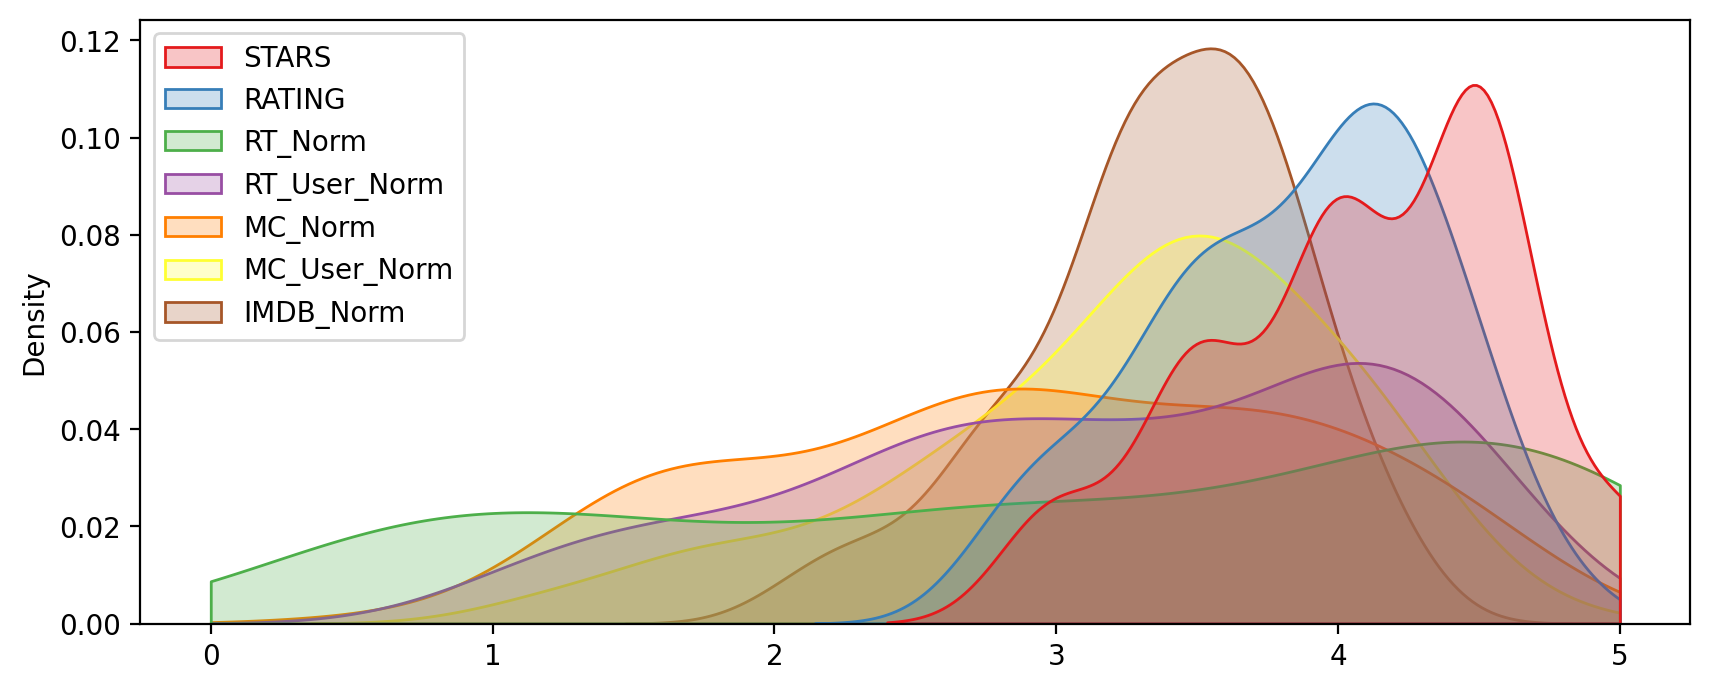

In [42]:
fig, ax = plt.subplots(figsize=(10,4), dpi=200)
sns.kdeplot(data=norm_scores, clip=[0,5], shade=True, palette='Set1')
move_legend(ax, "upper left")

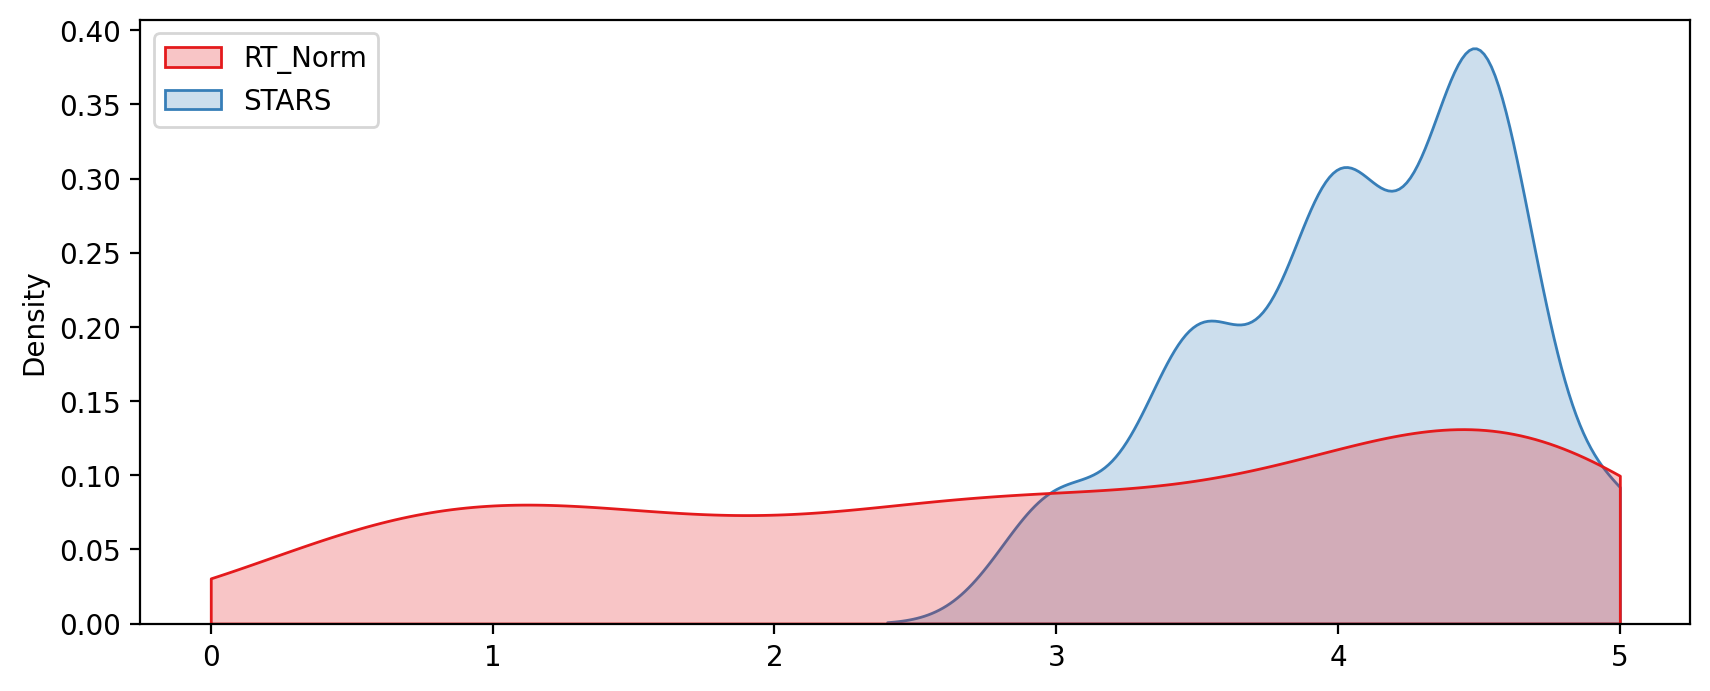

In [43]:
fig, ax = plt.subplots(figsize=(10,4), dpi=200)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']], clip=[0,5], shade=True,palette='Set1')
move_legend(ax,'upper left')

<AxesSubplot:ylabel='Count'>

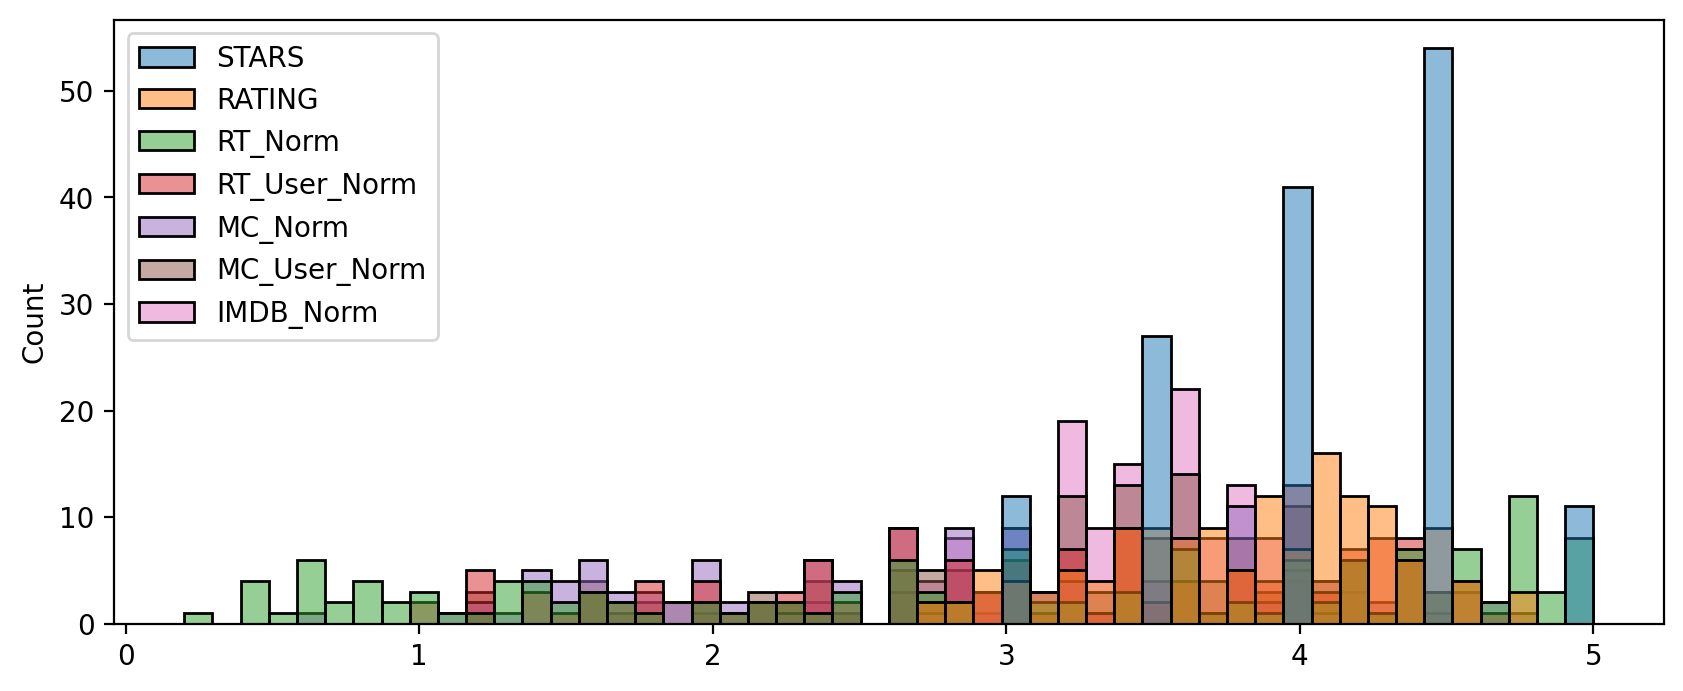

In [44]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=norm_scores,bins=50)

#### How are the worst movies rated across all platforms?

We'll create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies.

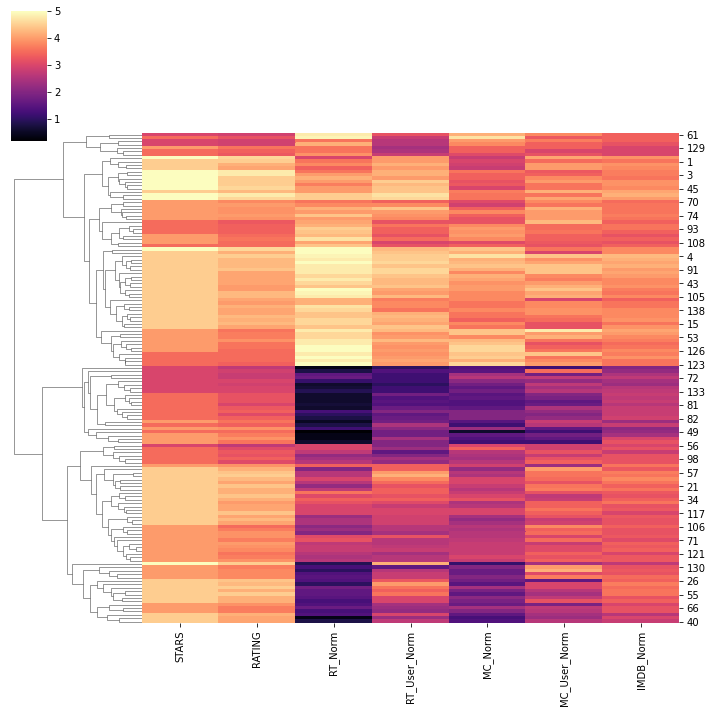

In [45]:
sns.clustermap(norm_scores, cmap='magma', col_cluster=False)

The clustermap shows us that mvoies which didn't receive high ratings from other platforms(the dark purple), received better ratings and stars on Fandango. 

Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?

In [46]:
norm_films = films[['FILM','STARS', 'RATING', 'RT_Norm', 'RT_User_Norm', 'MC_Norm', 'MC_User_Norm',
       'IMDB_Norm']]

In [47]:
worse_10 = norm_films.sort_values('RT_Norm',ascending=True).head(10)
worse_10

,FILM,STARS,RATING,RT_Norm,RT_User_Norm,MC_Norm,MC_User_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
109,The Vatican Tapes (2015),3.0,2.9,0.6,1.0,1.8,2.7,2.3
88,The Loft (2015),4.0,3.6,0.6,2.0,1.2,1.2,3.2
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8


Fandango is showing around 3-4 star ratings for films that are clearly bad. Notice the biggest offender, Taken 3!. Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms.

<AxesSubplot:ylabel='Density'>

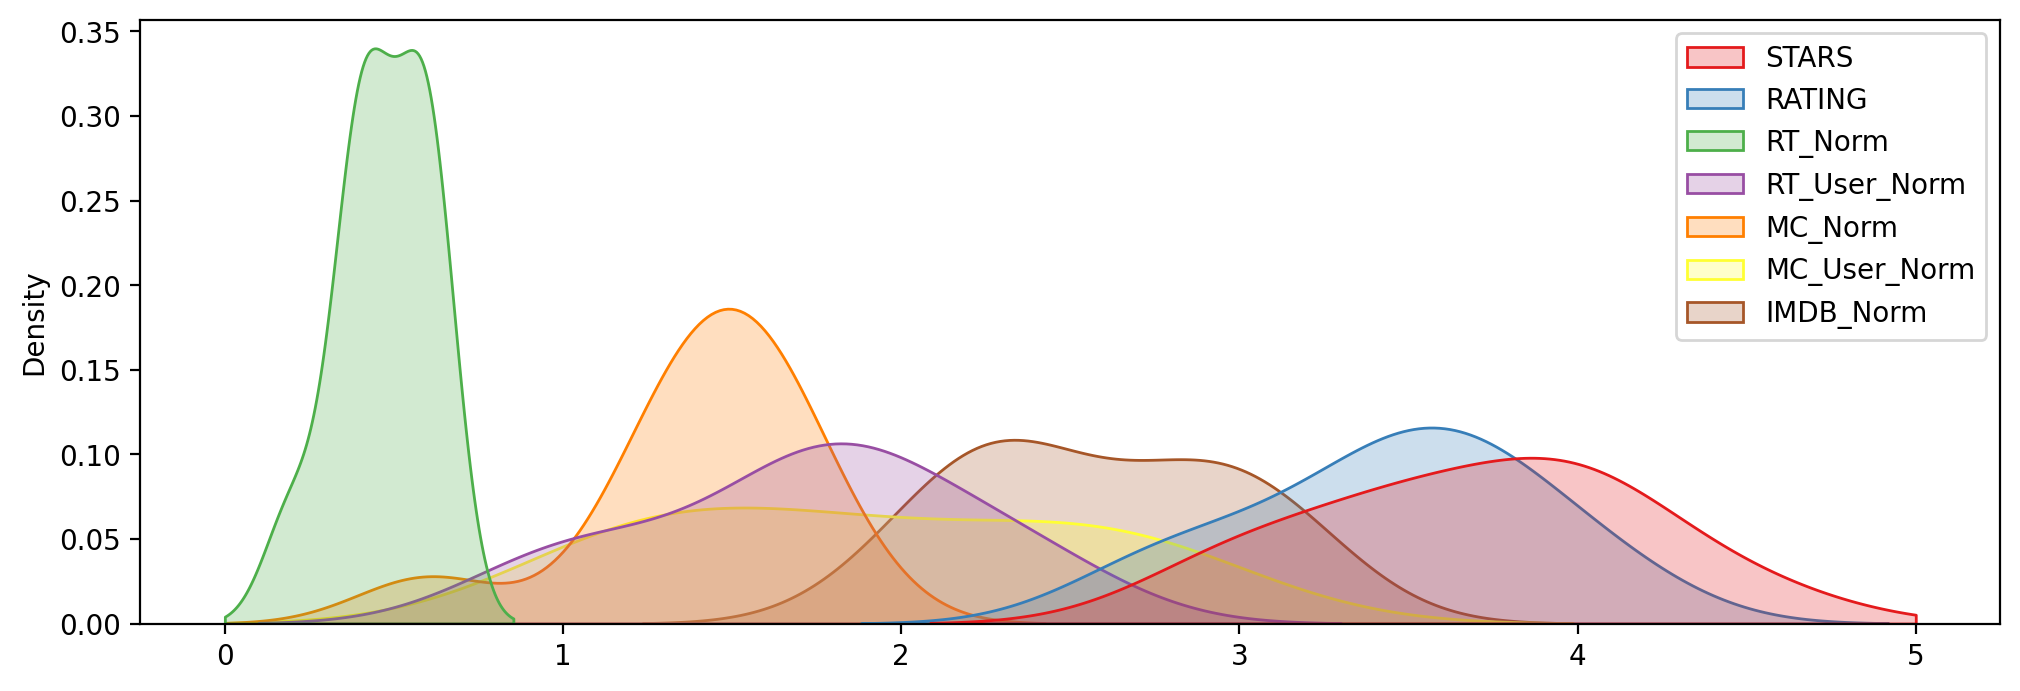

In [48]:
# distribution of the top 10 worst RT films
fig, ax = plt.subplots(figsize=(12,4), dpi=200)
sns.kdeplot(data=worse_10, clip=[0,5],shade=True,palette='Set1')

The plot above shows us the disparity in movie ratings from platforms we trust to not mislead us. The red plot is Fandango's displayed star rating, and it seems that the distribution ranges from 2 to 5 with an average of under 4. That's absolutely alarming. The other plots do not display this sort of behavior.

# 7. Conclusion

The displayed stars on Fandango's website are clearly bias. It has an incentive to provide inflated ratings to films. Higher rated films are more likely to sell tickets, which is how Fandango makes money. 

Rather than ignore Fandango's ratings altogether, a simple conversion from Fandango's biased rating system to a true 5-point scale allows more objective interpretation of a movie's quality.